,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Dataset Shape: (53940, 10)
Missing Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


,carat,cut,color,clarity,depth,table,price,x,y,z
21927,1.51,Good,H,VS2,64.0,59.0,10000,7.25,7.19,4.62
21928,1.70,Ideal,J,VS2,60.5,58.0,10002,7.73,7.74,4.68
21929,1.03,Ideal,E,VVS2,60.6,59.0,10003,6.50,6.53,3.95
21930,1.23,Very Good,G,VVS2,60.6,55.0,10004,6.93,7.02,4.23
21931,1.25,Ideal,F,VS2,61.6,55.0,10006,6.93,6.96,4.28


,carat,cut,color,clarity
0,0.23,Ideal,E,SI2
1,0.21,Premium,E,SI1
2,0.23,Good,E,VS1
3,0.29,Premium,I,VS2
4,0.31,Good,J,SI2


,carat,cut,color,clarity,depth,table,price,x,y,z
27415,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17


,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


,carat,price,price_per_carat
mean,0.79794,3932.799722,4008.394796
median,0.70000,2401.000000,3495.198031
min,0.20000,326.000000,1051.162791
max,5.01000,18823.000000,17828.846154


C:\Users\Elize\AppData\Local\Temp\ipykernel_35872\3046622325.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diamonds_grp = diamonds.groupby('cut')['price'].max().reset_index()


,cut,price
0,Ideal,18806
1,Premium,18823
2,Very Good,18818
3,Good,18788
4,Fair,18574


C:\Users\Elize\AppData\Local\Temp\ipykernel_35872\3046622325.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=diamonds, x='cut', y='price', palette='coolwarm')


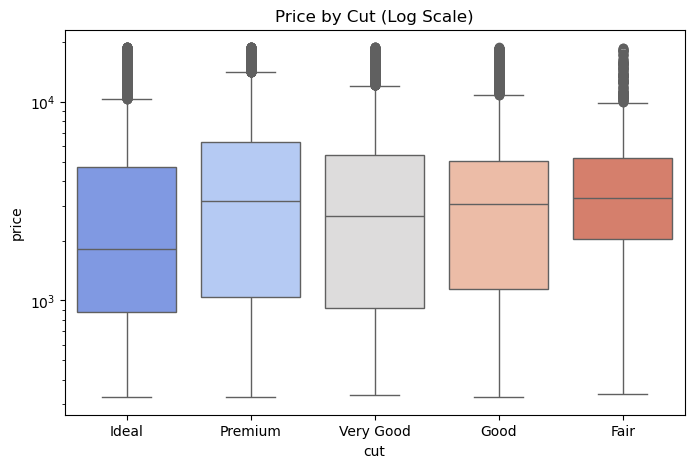

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570
26549,1.01,Premium,D,IF,61.6,56.0,16234,6.46,6.43,3.97,16073.267327
26105,1.02,Premium,D,IF,61.5,60.0,15370,6.52,6.45,3.99,15068.627451
26237,1.04,Premium,D,IF,60.6,56.0,15671,6.60,6.54,3.98,15068.269231
26003,1.02,Premium,D,IF,61.5,60.0,15231,6.45,6.52,3.99,14932.352941


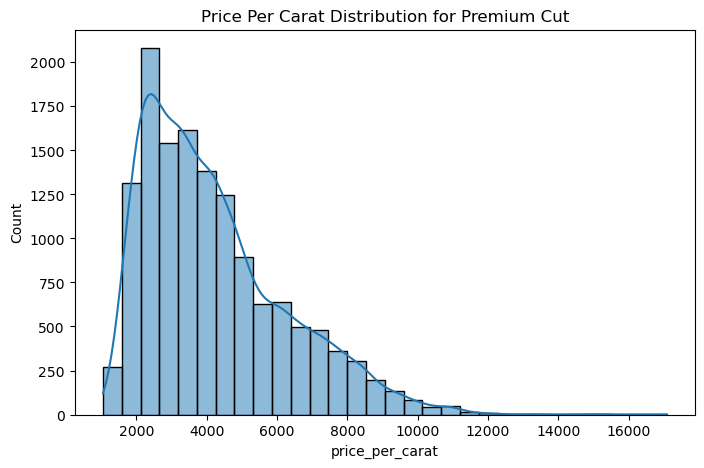

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diamonds = sns.load_dataset("diamonds")

display(diamonds.head())
print("Dataset Shape:", diamonds.shape)
print("Missing Values:\n", diamonds.isnull().sum())

high_price_diamonds = diamonds[diamonds['price'] >= 10000]
display(high_price_diamonds.head())

diamonds_selected = diamonds[['carat', 'cut', 'color', 'clarity']]
display(diamonds_selected.head())

diamonds_srtd = diamonds.sort_values(by='carat', ascending=False)
display(diamonds_srtd.head())

diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']
display(diamonds.head())

summary_stats = diamonds.agg({
    'carat': ['mean', 'median', 'min', 'max'],
    'price': ['mean', 'median', 'min', 'max'],
    'price_per_carat': ['mean', 'median', 'min', 'max']
})
display(summary_stats)

diamonds_grp = diamonds.groupby('cut')['price'].max().reset_index()
display(diamonds_grp)

plt.figure(figsize=(8,5))
sns.boxplot(data=diamonds, x='cut', y='price', palette='coolwarm')
plt.yscale('log')  
plt.title("Price by Cut (Log Scale)")
plt.show()

filtered_data = (diamonds.query("cut == 'Premium'")
                 .assign(price_per_carat=lambda df: df['price'] / df['carat'])
                 .sort_values(by='price_per_carat', ascending=False))

display(filtered_data.head())

plt.figure(figsize=(8,5))
sns.histplot(filtered_data['price_per_carat'], bins=30, kde=True)
plt.title("Price Per Carat Distribution for Premium Cut")
plt.show()